In [1]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [3]:
sep_coins = cv2.imread('DATA/pennies.jpg')

In [4]:
# median blur
# convert to gary scale
# binary threshold
# find countours



In [5]:
sep_blur = cv2.medianBlur(sep_coins,25)

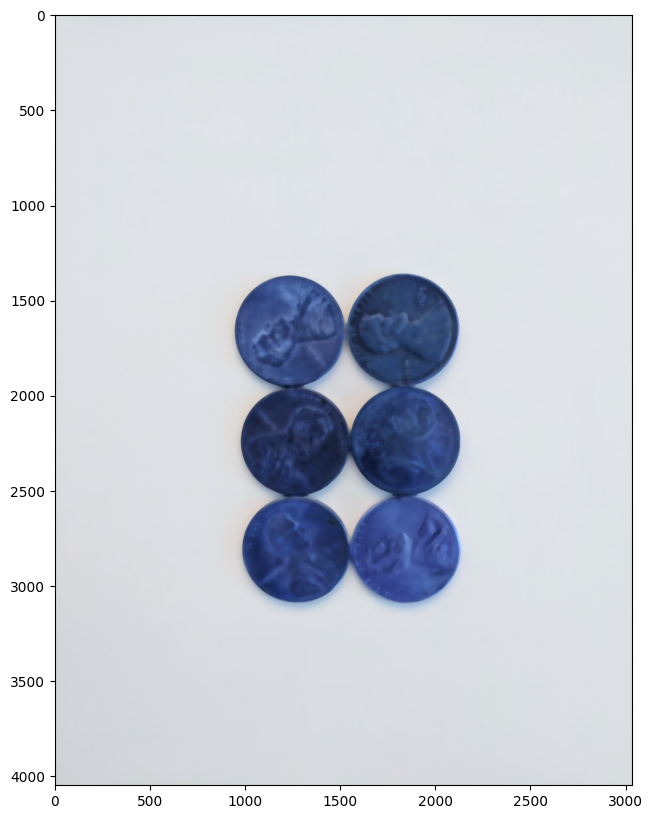

In [6]:
display(sep_blur)

In [8]:
gray_sep_coins = cv2.cvtColor(sep_blur,cv2.COLOR_BGR2GRAY)

In [12]:
ret, sep_thresh = cv2.threshold(gray_sep_coins,127,255,cv2.THRESH_BINARY_INV)

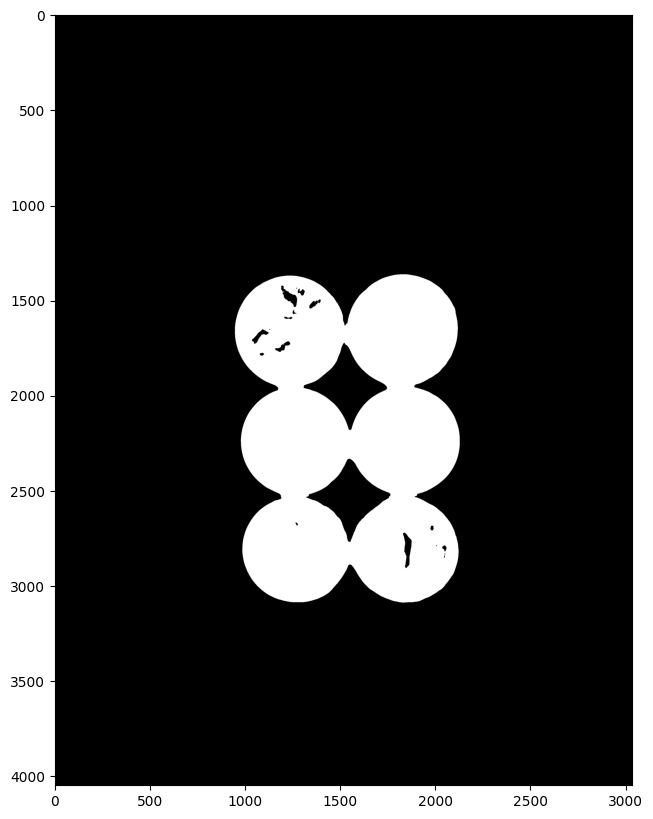

In [13]:
display(sep_thresh)

In [14]:
contours, hei = cv2.findContours(sep_thresh.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

In [15]:
for i in range(len(contours)):
    if hei[0][i][3]== -1:
        cv2.drawContours(sep_coins,contours,i,(255,0,0),10)

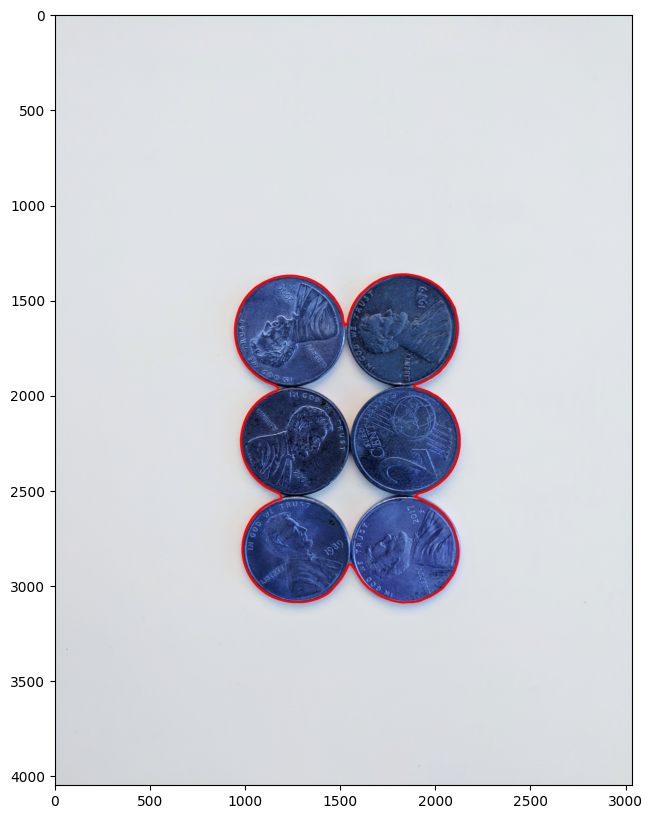

In [16]:
display(sep_coins)

In [18]:
# WATER SHED ALGORITHMS
img = cv2.imread('DATA/pennies.jpg')
img = cv2.medianBlur(img,35)

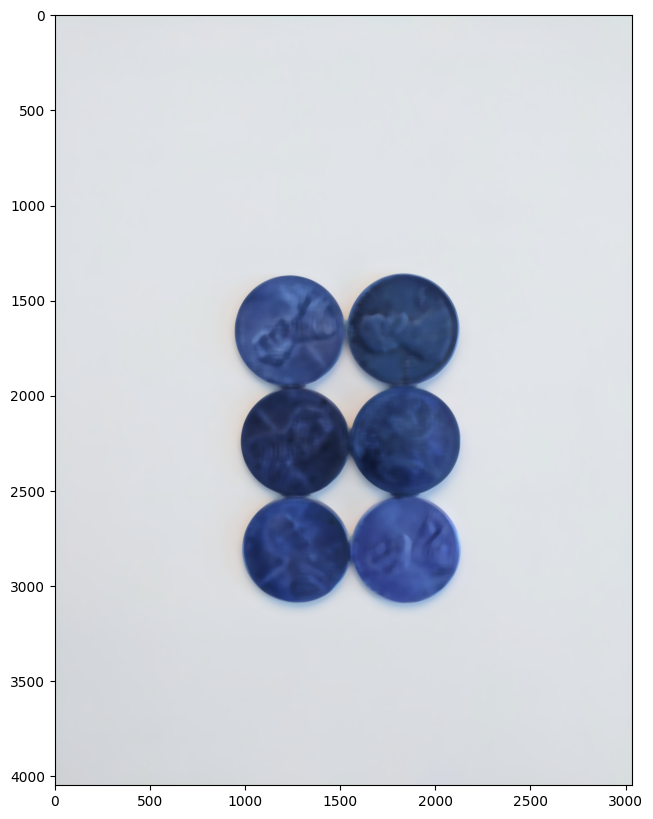

In [19]:
display(img)

In [20]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [21]:
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

In [22]:
#noise removal


In [24]:
kernel = np.ones((3,3),np.uint8)

In [54]:
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,2)

In [62]:
sure_bg = cv2.dilate(opening,kernel,iterations=3)

In [63]:
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)

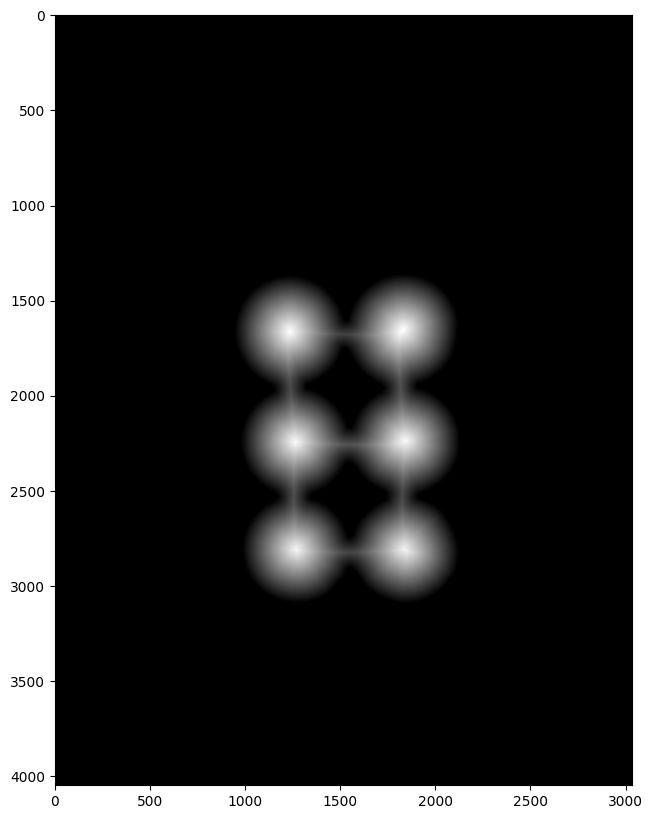

In [64]:
display(dist_transform)

In [65]:
ret, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(),255,0)

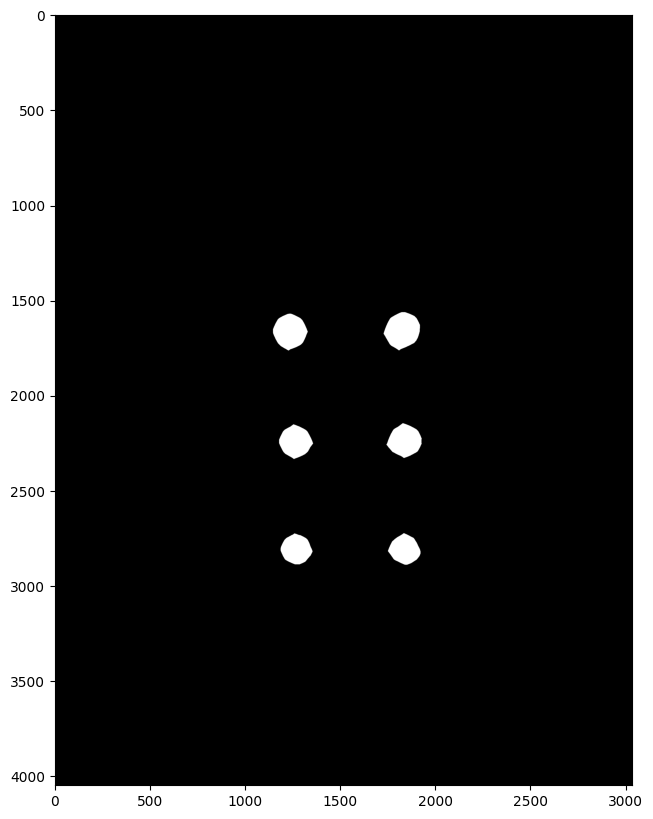

In [66]:
display(sure_fg)

In [67]:
sure_fg = np.uint8(sure_fg)

In [68]:
unknown = cv2.subtract(sure_bg,sure_fg)

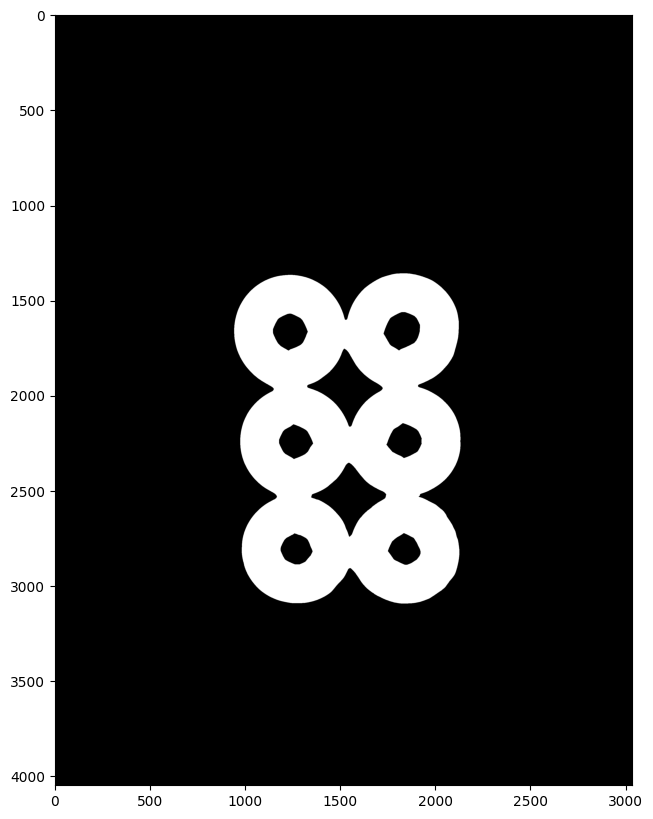

In [69]:
display(unknown)

In [70]:
ret, markers = cv2.connectedComponents(sure_fg)

In [71]:
markers = markers+1

In [72]:
markers[unknown==255] = 0

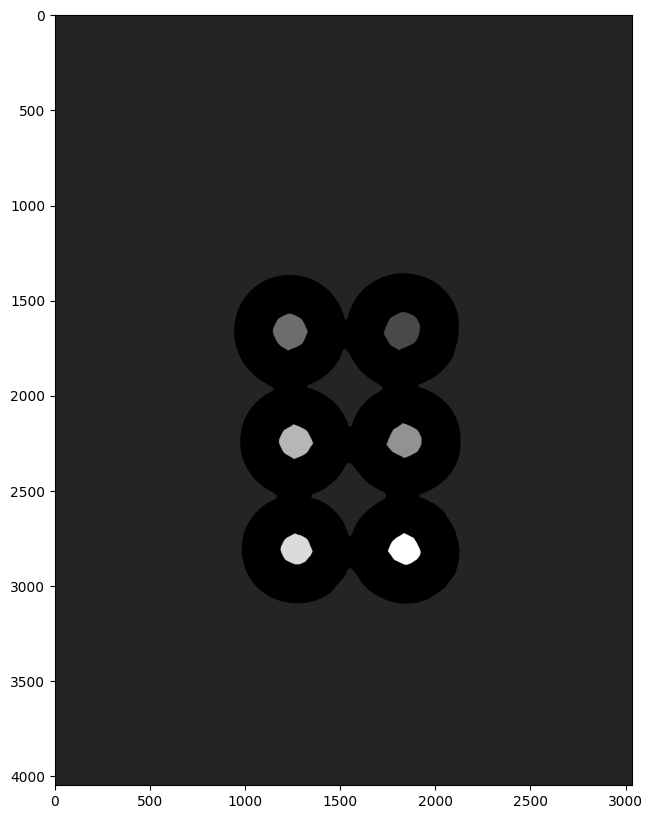

In [73]:
display(markers,cmap='gray')

In [74]:
markers = cv2.watershed(img,markers)

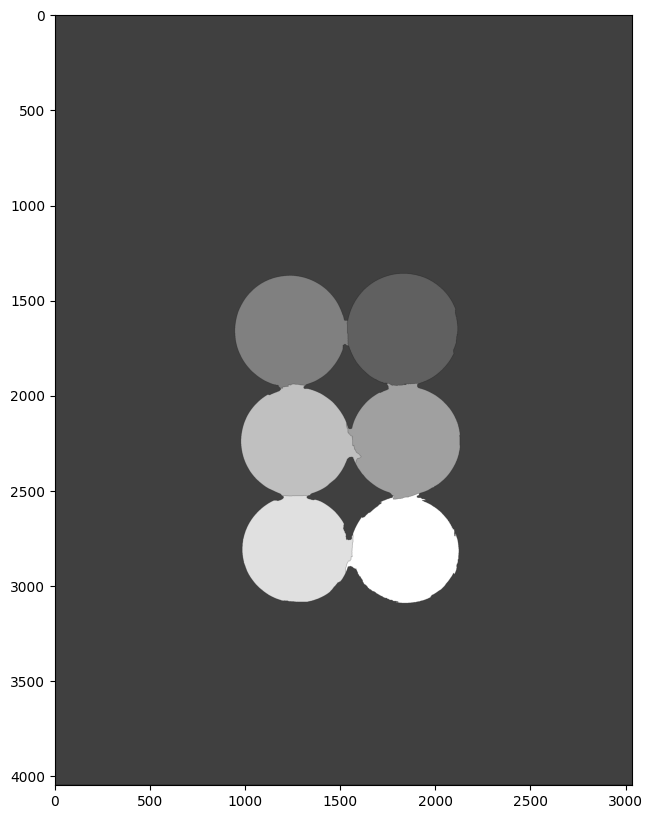

In [75]:
display(markers)

In [77]:
contours, hierarchy = cv2.findContours(markers.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

# For every entry in contours
for i in range(len(contours)):
    
    # last column in the array is -1 if an external contour (no contours inside of it)
    if hierarchy[0][i][3] == -1:
        
        # We can now draw the external contours from the list of contours
        cv2.drawContours(sep_coins, contours, i, (255, 0, 0), 10)

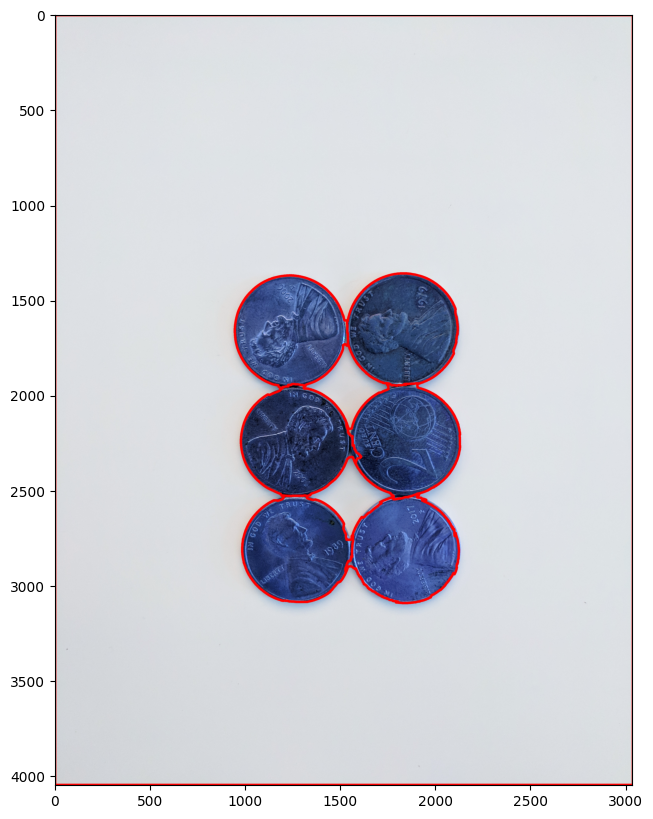

In [78]:
display(sep_coins)